In [1]:
from numpy.random import normal
from numpy.random import uniform
from numpy.random import multivariate_normal
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
import numpy as np

In [2]:
N=10**6

Considérense los resultados de la calibración de una balanza cuya capacidad es de 30 kg y cuya resolución es de $0.5\textrm{ g}$ que se muestran a continuación. La incertidumbre expandida sigue una distribución normal con $k=2$ al $95.45\%$. 

|Indicación de la balanza (g)|Masa de referencia (g)|Error de indicación (g)|Incertidumbre expandida (g)|
|---|---|---|---|
|$25.0$|$25.0$|$0.0$|$1.0$|
|$2996.5$|$3000.0$|$-3.5$|$1.0$|
|$5993.0$|$6000.0$|$-7.0$|$1.1$|
|$9988.5$|$10 000.0$|$-11.5$|$1.2$|
|$11 986.5$|$12 000.0$|$-13.5$|$1.2$|
|$14 983.0$|$15 000.0$|$-17.0$|$1.4$|
|$16 981.0$|$17 000.0$|$-19.0$|$1.4$|
|$19 977.5$|$20 000.0$|$-22.5$|$1.4$|
|$24 971.5$|$25 000.0$|$-28.5$|$1.8$|
|$26 970.0$|$27 000.0$|$-30.0$|$1.9$|
|$29 965.0$|$30 000.0$|$-35.0$|$2.0$|

La balanza no se puede ajustar porque no se cuenta con una pesa de ajuste y por lo tanto es necesario aplicar métodos de regresión para predecir el error de indicación de la misma.

In [3]:
error=np.array([0.0,-3.5,-7.0,-11.5,-13.5,-17.0,-19.0,-22.5,-28.5,-30.0,-35.0])
indicación=np.array([25.0,2996.5,5993.0,9988.5,11986.5,14983.0,16981.0,19977.5,24971.5,26970.0,29965.0])
u_exp=np.array([1.0,1.0,1.1,1.2,1.2,1.4,1.4,1.4,1.8,1.9,2.0])
u=u_exp/2

In [4]:
def Error(x,a,b):
    return b+a*x

In [5]:
error_=error.reshape((len(error),1))+normal(0,u.reshape((len(u),1)),size=(len(error),N))
indicación_=indicación.reshape((len(indicación),1))+uniform(-0.5/2,0.5/2,size=(len(indicación),N))

In [6]:
error_=error_.flatten('C').reshape((len(error)*N,))
indicación_=indicación_.flatten('C').reshape((len(indicación)*N,))

In [7]:
coefs,cov=curve_fit(Error,indicación_,error_)

Los coeficientes son:

In [8]:
coefs

array([-0.0011397 ,  0.03323244])

La incertidumbre estándar de los coeficientes:

In [9]:
np.sqrt(np.array([cov[0,0],cov[1,1]]))

array([2.59295493e-08, 4.59149964e-04])

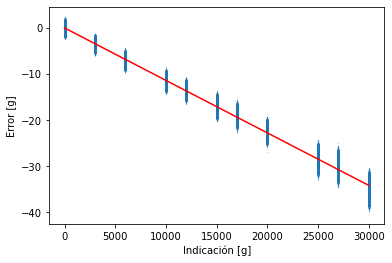

In [10]:
plt.scatter(indicación_,error_,marker=".",s=0.05)
plt.plot(np.arange(0,30000+5,5),coefs[0]*np.arange(0,30000+5,5)+coefs[1],color="red")
plt.xlabel("Indicación [g]")
plt.ylabel("Error [g]")
plt.show()

Al usar la recta de la forma:

$$\varepsilon=b+a\cdot I$$

La incertidumbre sobre $\varepsilon$ está dada por:

$$u^2(\varepsilon)=u^2(b)+I^2u^2(a)+a^2u^2(x)$$

Para el punto con indicación $25\,550\textrm{ g}$:

In [11]:
coefs[0]*25550+coefs[1]

-29.08598405439112

In [12]:
np.sqrt(cov[1,1]+25550**2*cov[0,0]+coefs[0]**2*(0.5/np.sqrt(12))**2)

0.0008226697104426439

In [13]:
muestreo=multivariate_normal(coefs,cov,size=N)
a=muestreo[:,0]
b=muestreo[:,1]

In [14]:
I=25550+uniform(-0.5/2,0.5/2,size=N)

In [15]:
Error_=Error(I,a,b)

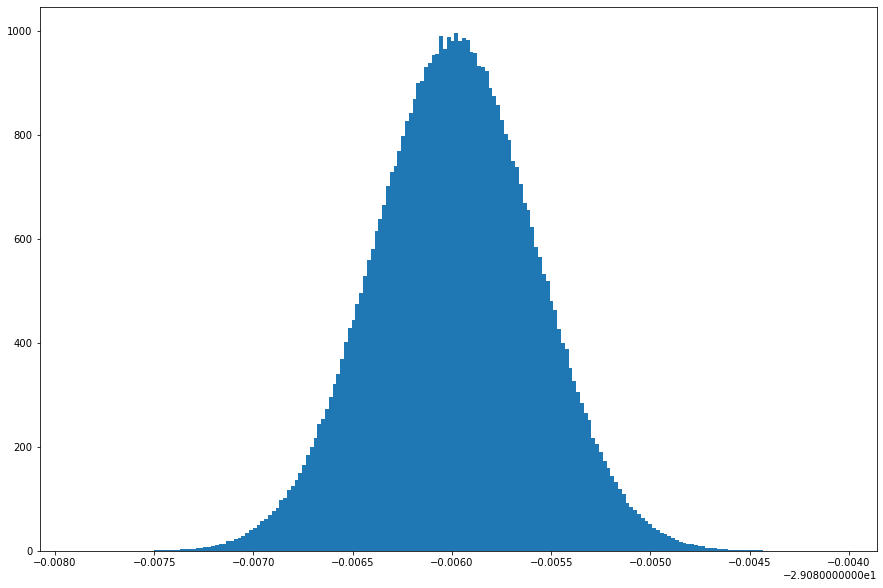

In [16]:
plt.figure(figsize=(15,10))
plt.hist(Error_,bins=200,density=True)
plt.show()

In [17]:
Error_.mean(),Error_.std()

(-29.085984435647763, 0.0004029893402786578)